obje tespiti

In [1]:
from mediapipe import solutions #el tespiti için görsel işleme görevleri için
from mediapipe.framework.formats import landmark_pb2 #"landmark_pb2" formatı cinsinden verileri almak için
import numpy as np
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import wget


In [2]:
MARGIN=10 #metnin üst köşesinden elin sınırına olan mesafe
FONT_SIZE=1 #yazı tipi boyutu
FONT_THICKNESS=1 #yazı kalınlığı
HANDEDNESS_TEXT_COLOR=(88,205,54) #rgb formatında yeşil renk

In [3]:
wget.download('https://storage.googleapis.com/mediapipe-tasks/hand_landmarker/hand_landmarker.task')

100% [..........................................................................] 7819037 / 7819037

'hand_landmarker (1).task'

In [16]:
base_options = python.BaseOptions(model_asset_path="hand_landmarker.task")
options=vision.HandLandmarkerOptions(base_options=base_options,num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

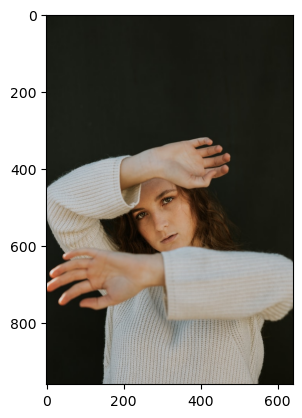

In [17]:
img=cv2.imread("data/el_ornek.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img)

In [18]:
img.shape

(960, 640, 3)

In [19]:
image=mp.Image.create_from_file("data/el_ornek.jpg")
detection_result=detector.detect(image)

In [20]:
image

In [21]:
detection_result

HandLandmarkerResult(handedness=[[Category(index=1, score=0.9357715249061584, display_name='Right', category_name='Right')], [Category(index=0, score=0.9608952403068542, display_name='Left', category_name='Left')]], hand_landmarks=[[NormalizedLandmark(x=0.39291912317276, y=0.7066095471382141, z=-3.293027077688748e-07, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.34312063455581665, y=0.7504479885101318, z=-0.019821790978312492, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.2708950638771057, y=0.7737331986427307, z=-0.027366425842046738, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.20807738602161407, y=0.779670238494873, z=-0.03694787248969078, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.15704940259456635, y=0.7829774022102356, z=-0.04580849036574364, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.2020859718322754, y=0.7279683947563171, z=0.004851780831813812, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.13295286893844604, y=0.743130087

In [22]:
def draw_landmarks_on_image(rgb_image, detection_result):
    hand_landmarks_list=detection_result. hand_landmarks #tespit edilen elin işaretlendirmelerini içerir
    handedness_list=detection_result.handedness #tespit edilen elin sağ ve sol olma durumu
    annotated_image= np.copy(rgb_image) #girdi görüntüsü kopyalanır

    #tespit edilen elleri işaretlemek için bir döngü oluşturulur
    for idx in range(len(hand_landmarks_list)):
        hand_landmarks=hand_landmarks_list[idx] #indeksi kullanarak el işaretlemelerini alır
        handedness=handedness_list[idx] #indeksi kullanarak hangi elin tespit edildiği

        hand_landmarks_proto=landmark_pb2.NormalizedLandmarkList() #"landmark_pb2" formatında bir liste oluşturur
        hand_landmarks_proto.landmark.extend([landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks])
        solutions.drawing_utils.draw_landmarks( #el işaretlemeleri görüntü üzerine çizilir
            annotated_image,
            hand_landmarks_proto,
            solutions.hands.HAND_CONNECTIONS,
            solutions.drawing_styles.get_default_hand_landmarks_style(),
            solutions.drawing_styles.get_default_hand_connections_style()) 
        
        height, width, _=annotated_image.shape
        x_coordinates = [landmark.x for landmark in hand_landmarks]
        y_coordinates = [landmark.y for landmark in hand_landmarks]
        text_x=int(min(x_coordinates*width))
        text_y=int(min(y_coordinates*height))-MARGIN

        cv2.putText(annotated_image,f"{handedness[0].category_name}", (text_x,text_y), cv2.FONT_HERSHEY_DUPLEX, FONT_SIZE, HANDEDNESS_TEXT_COLOR, FONT_THICKNESS,cv2.LINE_AA)

    return annotated_image

In [23]:
image.numpy_view()

array([[[21, 24, 17],
        [21, 24, 17],
        [21, 24, 17],
        ...,
        [23, 24, 16],
        [23, 24, 16],
        [23, 24, 16]],

       [[21, 24, 17],
        [21, 24, 17],
        [21, 24, 17],
        ...,
        [23, 24, 16],
        [23, 24, 16],
        [23, 24, 16]],

       [[21, 24, 17],
        [21, 24, 17],
        [21, 24, 17],
        ...,
        [23, 24, 16],
        [23, 24, 16],
        [23, 24, 16]],

       ...,

       [[15, 16, 10],
        [15, 16, 10],
        [15, 16, 10],
        ...,
        [16, 16,  8],
        [16, 16,  8],
        [16, 16,  8]],

       [[15, 16, 10],
        [15, 16, 10],
        [15, 16, 10],
        ...,
        [15, 15,  7],
        [16, 16,  8],
        [16, 16,  8]],

       [[15, 16, 10],
        [15, 16, 10],
        [15, 16, 10],
        ...,
        [15, 15,  7],
        [15, 15,  7],
        [15, 15,  7]]], dtype=uint8)

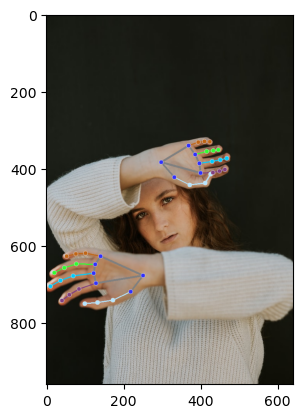

In [24]:
annotated_image=draw_landmarks_on_image(image.numpy_view(), detection_result)
plt.figure()
plt.imshow(annotated_image)

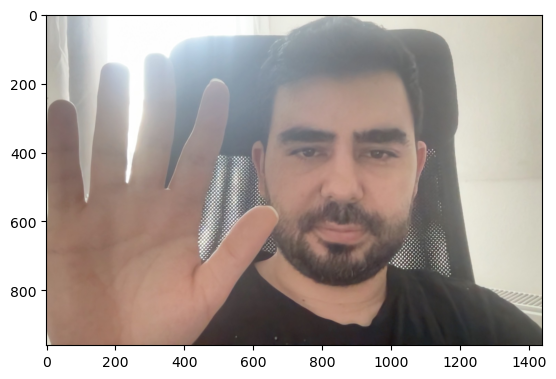

In [25]:
img=cv2.imread("data/el_ornek2.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img)

In [26]:
image=mp.Image.create_from_file("data/el_ornek2.jpg")

detection_result= detector.detect(image)

In [27]:
detection_result

HandLandmarkerResult(handedness=[[Category(index=0, score=0.9869698882102966, display_name='Left', category_name='Left')]], hand_landmarks=[[NormalizedLandmark(x=0.13932213187217712, y=0.999625563621521, z=6.62074057800055e-07, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.24264460802078247, y=0.9528952836990356, z=-0.05306704342365265, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.3279273509979248, y=0.8380020260810852, z=-0.07162006199359894, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.3831513226032257, y=0.7179696559906006, z=-0.08617129921913147, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.4401511549949646, y=0.6285657286643982, z=-0.10138418525457382, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.2658219039440155, y=0.6010321378707886, z=-0.04122306406497955, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.30657508969306946, y=0.4348279535770416, z=-0.07212378084659576, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.32989615

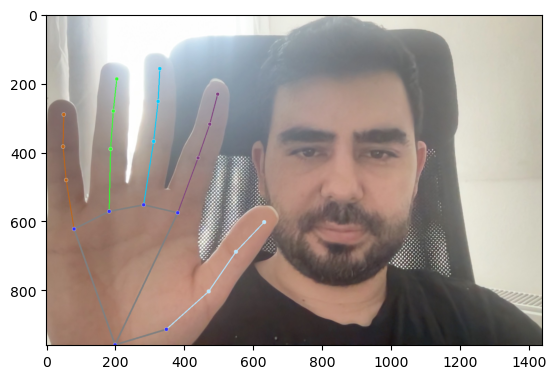

In [15]:
annotated_image=draw_landmarks_on_image(image.numpy_view(), detection_result)
plt.figure()
plt.imshow(annotated_image)